# Census Income Project

# Importing Neccesary libraries

In [16]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [2]:
df=pd.read_csv("census.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


There are 32560 rows with 15 columns including the target column.

# Type of problem

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
This problem refers to clasification problem , have to predict $50k or not refers to 0 and 1

In [3]:
df.columns #columns of data

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
df.info() #information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


So there are 6 integer type data and 9 object type data where our target column is object type. we will convert object types to numeric type using label encoder in later steps.

In [5]:
df.dtypes #datatypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
#checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

So we can see there are no null values.

# Exploratory Data Analysis:

In [7]:
#summary statiscs
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1.We can observe that Age column is having mean greater than median.

2.We can also see that some of the values of capital_gain and capital_loss are zero's.

3.There is a huge difference between the 75th percentile and maximum values in the columns 'Age','Capital_gain','Capital_loss','Hours_per_week' which means there will be a large number of outliers.

# Checking unique values:

In [8]:
df['Native_country'].unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

There are many unique values in Native_country feature

In [9]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

There are 7 unique features in Marital_status feature.

In [10]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [11]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

# Data Visualization:

<AxesSubplot:>

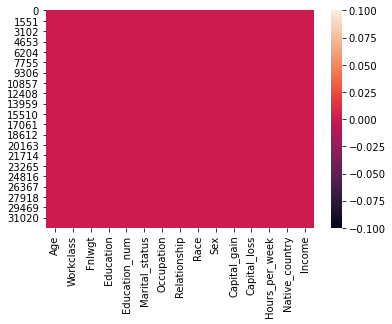

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#checking null values using heatmap
sns.heatmap(df.isnull())

# Univariate analysis:

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

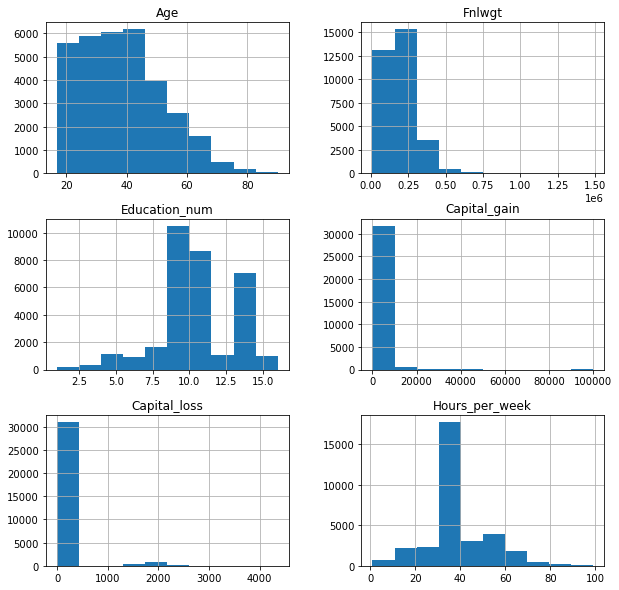

In [14]:
#plotting histogram for numerical values
df.hist(figsize=(10,10))

We can see that none of the features is scaled and having skewness in them.

<AxesSubplot:xlabel='Workclass', ylabel='count'>

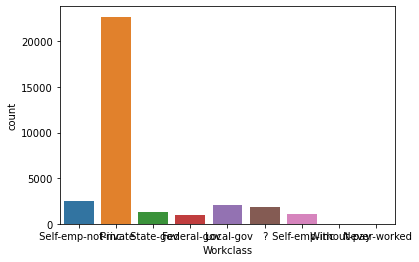

In [17]:
#categorical Values
sns.countplot(df['Workclass'])

<AxesSubplot:xlabel='Education', ylabel='count'>

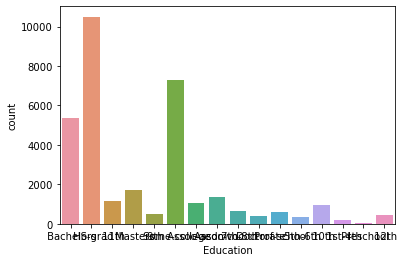

In [18]:
sns.countplot(df['Education'])
#countplot showing education graph

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

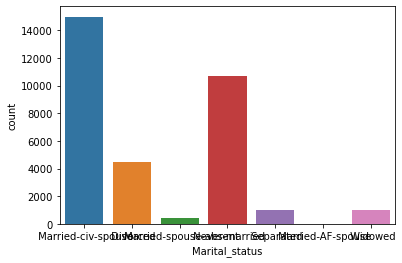

In [19]:
sns.countplot(df['Marital_status'])
#countplot showing maritial status of different catogories

<AxesSubplot:xlabel='Occupation', ylabel='count'>

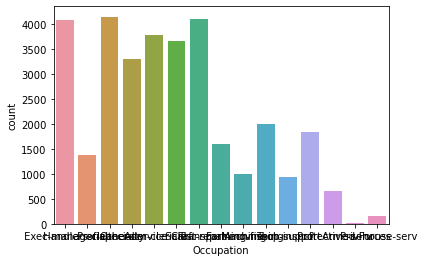

In [20]:
sns.countplot(df['Occupation'])
#countplot showing occupation

<AxesSubplot:xlabel='Relationship', ylabel='count'>

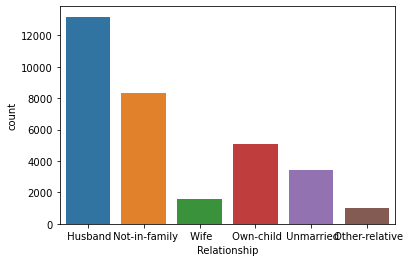

In [21]:
sns.countplot(df['Relationship'])
#countplot showing relationship data

<AxesSubplot:xlabel='Race', ylabel='count'>

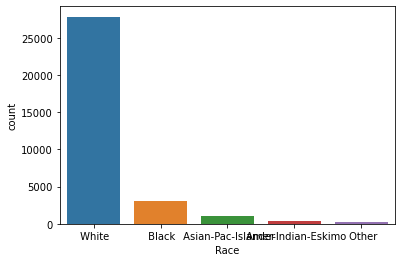

In [22]:
sns.countplot(df['Race'])
#countplot showing race that is color of people

<AxesSubplot:xlabel='Sex', ylabel='count'>

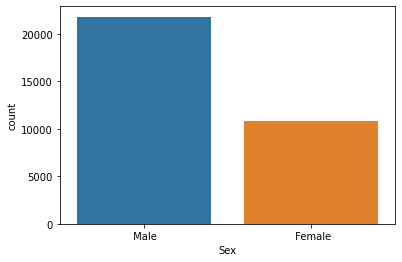

In [23]:
sns.countplot(df['Sex'])
#showing that males having more income compare to female

<AxesSubplot:xlabel='Native_country', ylabel='count'>

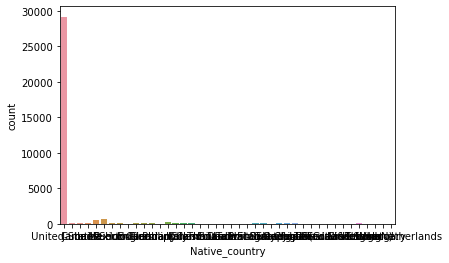

In [24]:
sns.countplot(df['Native_country'])
#showing native country

<AxesSubplot:xlabel='Income', ylabel='count'>

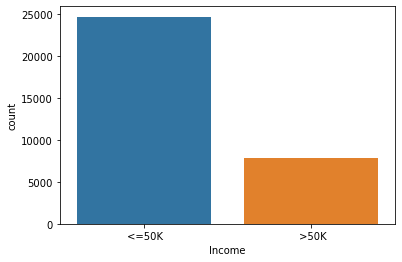

In [25]:
sns.countplot(df['Income'])
#showing that income below or more than 50k

# Bivariate analysis:

<AxesSubplot:xlabel='count', ylabel='Workclass'>

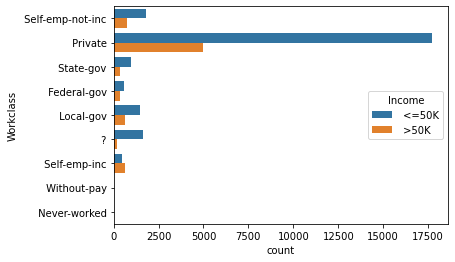

In [26]:
sns.countplot(y='Workclass',hue='Income',data=df)
#countplot showing workclass with repsect to incoME

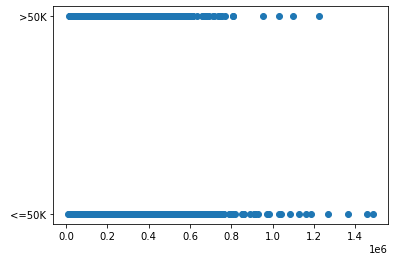

In [27]:
plt.scatter(df['Fnlwgt'],df['Income'])
#scatter plot showing income and Fnlwgt

<AxesSubplot:xlabel='count', ylabel='Education'>

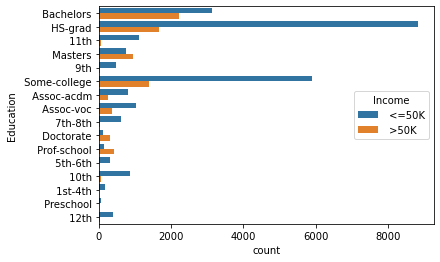

In [28]:
sns.countplot(y='Education',hue='Income',data=df)
#countplot showing how income varies with education

<AxesSubplot:xlabel='count', ylabel='Age'>

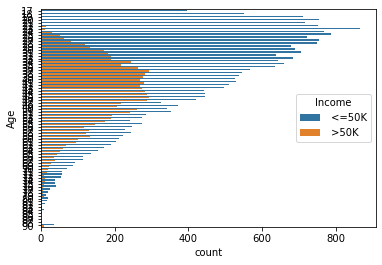

In [29]:
sns.countplot(y='Age',hue='Income',data=df)
#countplot showing how income depends upon age of people

<AxesSubplot:xlabel='count', ylabel='Native_country'>

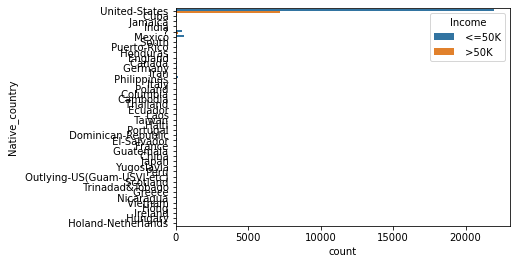

In [30]:
sns.countplot(y='Native_country',hue='Income',data=df)
#countplot showing that how income correspond to all countries

# Multivariate Analysis:

<AxesSubplot:xlabel='Sex', ylabel='Age'>

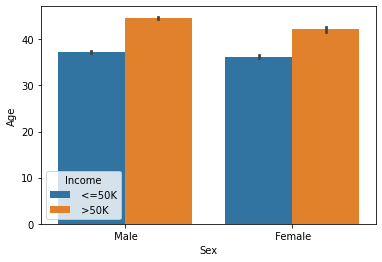

In [31]:
sns.barplot(x='Sex',y='Age',hue='Income',data=df)
#barplot showing income with respect to age and sex

<AxesSubplot:xlabel='Marital_status', ylabel='Age'>

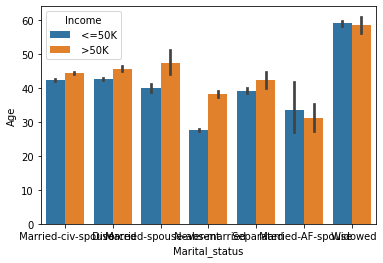

In [32]:
sns.barplot(x='Marital_status',y='Age',hue='Income',data=df)
#barplot showing income with respect to age and maritial status


<AxesSubplot:xlabel='Hours_per_week', ylabel='Occupation'>

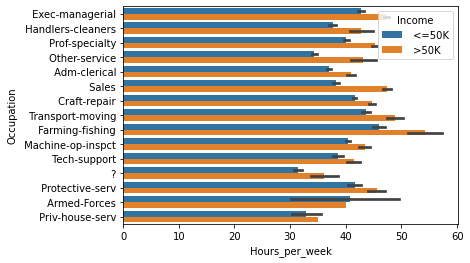

In [33]:
sns.barplot(x='Hours_per_week',y='Occupation',hue='Income',data=df)

Observations:

1.The people with income <=50k are more than the people with income>=50k

2.Most of the people with private jobs are earning less than 50k when compare to other sectors.

3.Bachelor degree holders are getting more than 50k when compare to other studies.

4.The input feature fnlwgt is not much contributing to our target feature.


# Correlation:

In [34]:
corr=df.corr() #correlation of data
corr

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

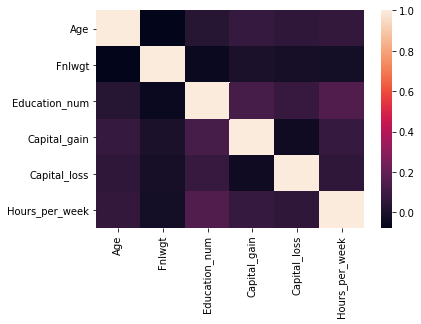

In [35]:
sns.heatmap(corr) #heatmap correspond to correlation

<AxesSubplot:>

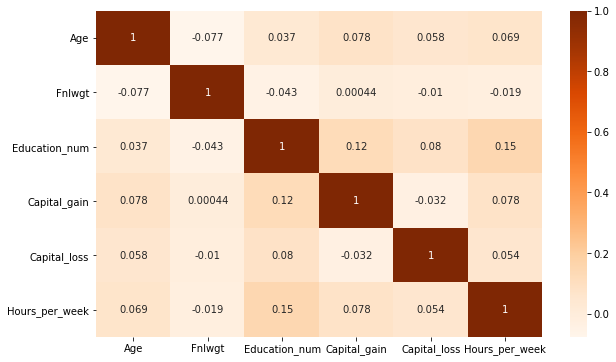

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,cmap='Oranges',annot=True)

Dark shades shows high negative correlation and the lighter shades shows positive correlation.

Since correlation is drawn only between numerical features we are not finding the "Income" feature here so we cannot decide anything here.

# Plotting Outliers:

<AxesSubplot:xlabel='Age'>

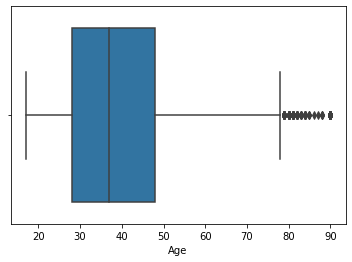

In [37]:
sns.boxplot(df['Age']) #boxplot showing age

<AxesSubplot:xlabel='Fnlwgt'>

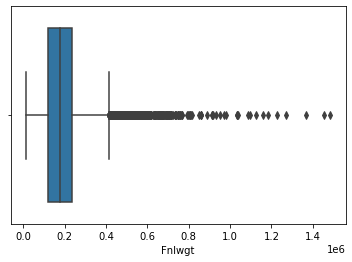

In [38]:
sns.boxplot(df['Fnlwgt'])#boxplot

<AxesSubplot:xlabel='Education_num'>

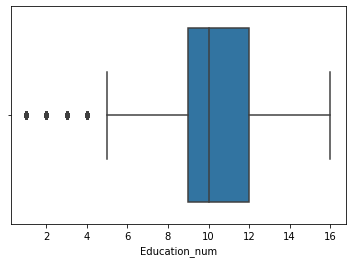

In [39]:
sns.boxplot(df['Education_num'])#boxplot showing education_num

<AxesSubplot:xlabel='Capital_gain'>

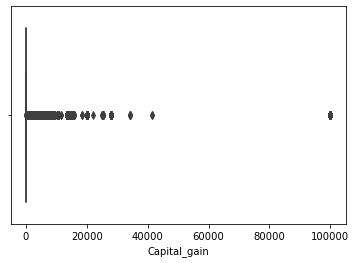

In [40]:
sns.boxplot(df['Capital_gain'])#boxplot showing outliers in capital_gain

<AxesSubplot:xlabel='Hours_per_week'>

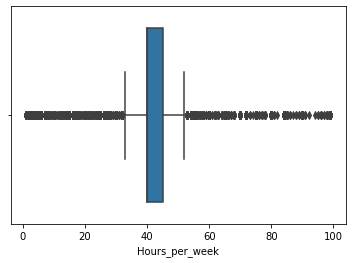

In [42]:
sns.boxplot(df['Hours_per_week'])#outliers showing in hoursper week

We can see lot of outliers are lying in numerical columns, we will remove it

# Distribution Curves:

<AxesSubplot:xlabel='Age', ylabel='Density'>

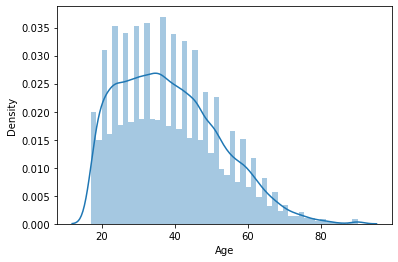

In [43]:
sns.distplot(df['Age']) # distplot for age chking for skewness

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

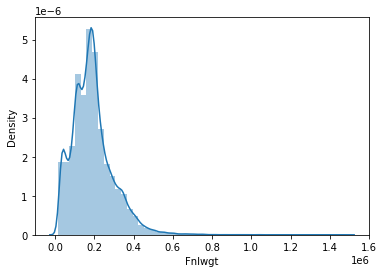

In [44]:
sns.distplot(df['Fnlwgt']) #showing skewnwss in curve

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

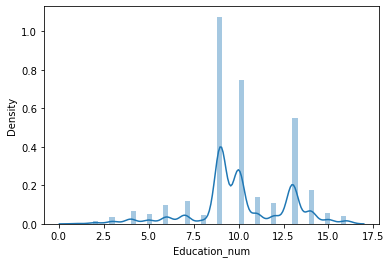

In [45]:
sns.distplot(df['Education_num'])#distplot showing education_num

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

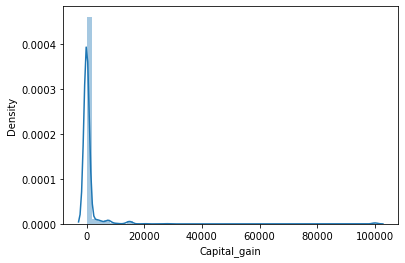

In [46]:
sns.distplot(df['Capital_gain'])#showing right skewness in capital gain

<AxesSubplot:xlabel='Capital_loss', ylabel='count'>

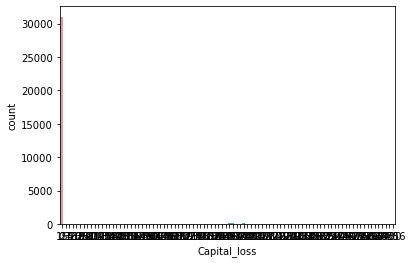

In [47]:
sns.countplot(df['Capital_loss'])#countplot showing capital loss

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

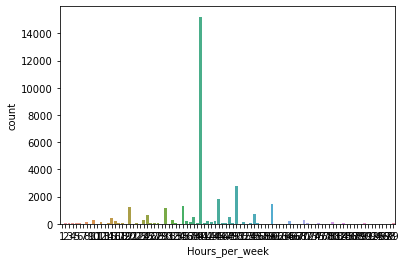

In [48]:
sns.countplot(df['Hours_per_week'])

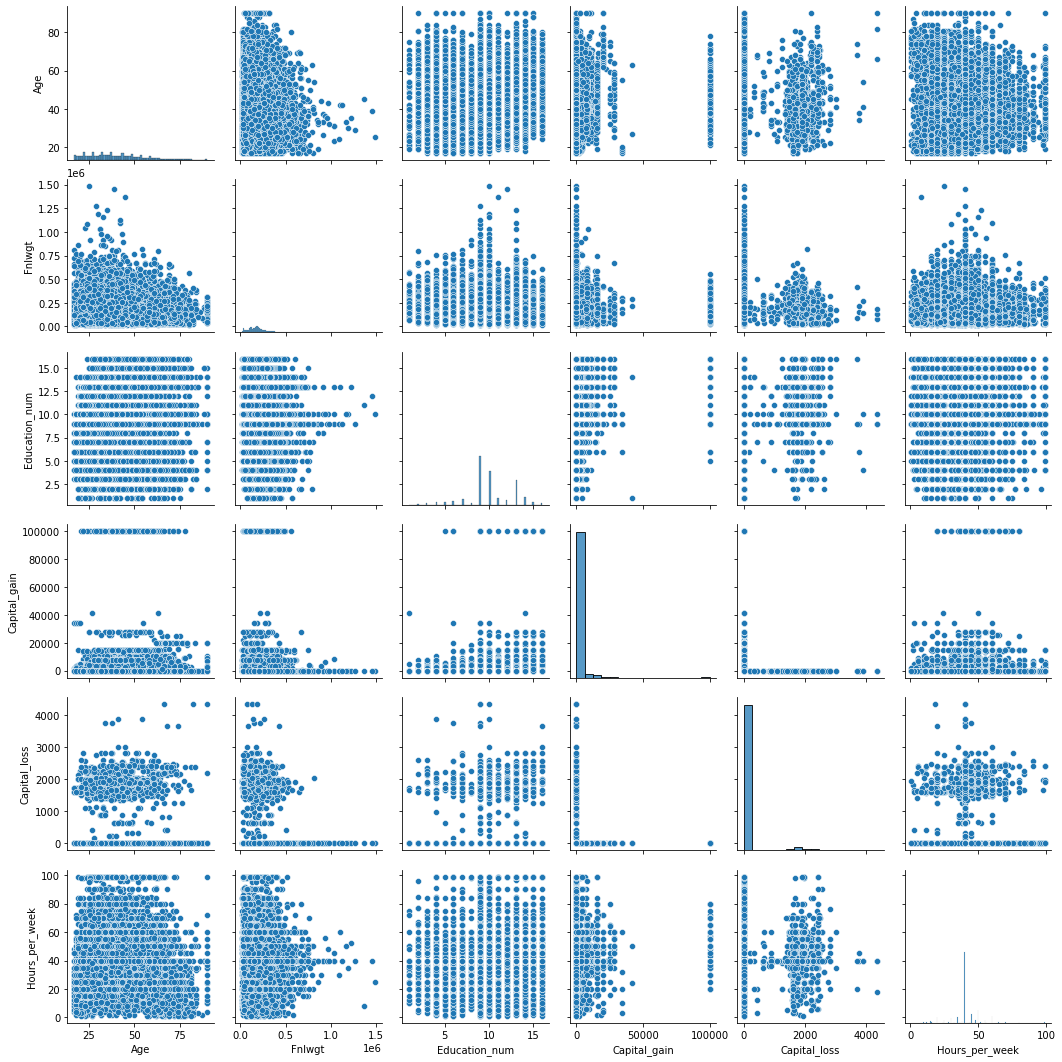

In [49]:
sns.pairplot(df)#pairplot

No where we are finding the normal distribution there is skewness in all features so we will remove that also in further process.

In [50]:
#dropping "Fnlwgt" column
df.drop('Fnlwgt',axis=1,inplace=True)
df.shape

(32560, 14)

# Removing Outliers:

In [52]:
from scipy.stats import zscore #removing outliers using zscore

z=np.abs(zscore(df[['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week']]))
z

array([[0.83709708, 1.13477863, 0.14591373, 0.21666301, 2.22212013],
       [0.04264043, 0.42002663, 0.14591373, 0.21666301, 0.03542999],
       [1.05703146, 1.19742926, 0.14591373, 0.21666301, 0.03542999],
       ...,
       [1.42358875, 0.42002663, 0.14591373, 0.21666301, 0.03542999],
       [1.21562378, 0.42002663, 0.14591373, 0.21666301, 1.65520046],
       [0.98372   , 0.42002663, 1.88840054, 0.21666301, 0.03542999]])

In [53]:
threshold=3
print(np.where(z>3)) #chking for threshold>3

(array([    9,    22,    27, ..., 32524, 32524, 32530]), array([4, 3, 4, ..., 0, 4, 4]))


In [54]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape) #new data

(32560, 14)
(30150, 14)


# Loss percentage

In [55]:
lp=(32560-30150)/32560*100
lp #loss percentage

7.401719901719901

Since loss percent 7.4 < 10 we can proceed further.

# Encoding:

In [57]:
from sklearn.preprocessing import LabelEncoder
#using labelencoder to convert object dtypes to numeric
le=LabelEncoder()
df['Workclass']=le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Income']=le.fit_transform(df['Income'])

In [58]:
df.head() #first five columns

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,12,14,2,4,5,4,0,0,0,40,39,0


In [59]:
#checking skewness
df.skew()

Age                0.558738
Workclass         -0.752280
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

# Feature Engineering:

In [60]:
#using StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(df)

In [61]:
scaled

array([[ 0.83709708,  1.46388339, -0.33544266, ..., -2.22212013,
         0.29157343, -0.5632099 ],
       [-0.04264043,  0.09012148,  0.18131885, ..., -0.03542999,
         0.29157343, -0.5632099 ],
       [ 1.05703146,  0.09012148, -2.40248871, ..., -0.03542999,
         0.29157343, -0.5632099 ],
       ...,
       [ 1.42358875,  0.09012148,  0.18131885, ..., -0.03542999,
         0.29157343, -0.5632099 ],
       [-1.21562378,  0.09012148,  0.18131885, ..., -1.65520046,
         0.29157343, -0.5632099 ],
       [ 0.98372   ,  0.77700244,  0.18131885, ..., -0.03542999,
         0.29157343,  1.77553698]])

# PCA:

In [62]:
from sklearn.decomposition import PCA #PCA to scaled data
tpca=PCA()
Y=tpca.fit(scaled)

In [63]:
Y.explained_variance_ratio_ #variance ratio

array([0.17137081, 0.10296011, 0.09037365, 0.08140077, 0.0743384 ,
       0.07312687, 0.06953794, 0.0613896 , 0.06046014, 0.0546333 ,
       0.0494837 , 0.04651483, 0.03728721, 0.02712266])

In [64]:
var_cum=np.cumsum(Y.explained_variance_ratio_)*100
var_cum

array([ 17.13708139,  27.43309258,  36.4704578 ,  44.61053506,
        52.04437478,  59.35706155,  66.31085582,  72.44981559,
        78.49582944,  83.95915915,  88.90752945,  93.55901235,
        97.28773376, 100.        ])

In [65]:
k=np.argmax(var_cum>99)
print("Number of components explaining 99% variance",k) #number of components

Number of components explaining 99% variance 13


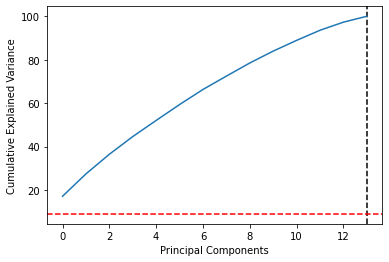

In [66]:
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.axvline(x=k, color="k", linestyle='--')
plt.axhline(y=9, color="r", linestyle='--')
plt.plot(var_cum)
plt.show() #plot showing pCA and cEV

# Splitting the data:

In [67]:
x=df.iloc[:,-14:-1]
y=df.iloc[:,-1:]

In [68]:
x

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,9,13,2,4,0,4,1,0,0,13,39
1,38,4,11,9,0,6,1,4,1,0,0,40,39
2,53,4,1,7,2,6,0,2,1,0,0,40,39
3,28,4,9,13,2,10,5,2,0,0,0,40,5
4,37,4,12,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,11,9,4,1,3,4,1,0,0,20,39


In [69]:
y

,Income
0,0
1,0
2,0
3,0
4,0
...,...
32555,0
32556,1
32557,0
32558,0


# Removing Skewness:

In [70]:
from sklearn.preprocessing import power_transform #removing skewness
power_transform(x,method='yeo-johnson')

array([[ 0.89194656,  1.64422286, -0.47701209, ..., -0.2212132 ,
        -2.22151541,  0.32907402],
       [ 0.10271741,  0.01186427,  0.09048172, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [ 1.06438077,  0.01186427, -2.06759959, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       ...,
       [ 1.33455599,  0.01186427,  0.09048172, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [-1.35834147,  0.01186427,  0.09048172, ..., -0.2212132 ,
        -1.65499204,  0.32907402],
       [ 1.00782289,  0.79430139,  0.09048172, ..., -0.2212132 ,
        -0.03557001,  0.32907402]])

# Splitting the data into train and test sets:

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2) #giving random state

# Classification algorithms:

# 1.Decision Tree Classifier:

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
y_pred_dt=dt.predict(x_test) #testing data
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_pred_dt,y_test))#accuracy score

0.8183353808353808


In [76]:
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy of DecisionTreeClassifier is:{}%".format(round(dt.score(x_test,y_test)*100,2)))
print("\n")
print("Confusion Matrix of Decision Tree Classifier:\n\n",confusion_matrix(y_test,y_pred_dt))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.88      0.89      0.88      4957
           1       0.62      0.60      0.61      1555

    accuracy                           0.82      6512
   macro avg       0.75      0.74      0.75      6512
weighted avg       0.82      0.82      0.82      6512

Test Accuracy of DecisionTreeClassifier is:81.83%


Confusion Matrix of Decision Tree Classifier:

 [[4395  562]
 [ 621  934]]


# 2.Logistic Regression:

In [77]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train) #training data

LogisticRegression()

In [78]:
y_pred_lr=lr.predict(x_test)  #testing data
y_pred_lr

array([0, 0, 0, ..., 1, 0, 0])

In [79]:
print(accuracy_score(y_pred_lr,y_test))

0.8025184275184275


In [80]:
print("LogisticRegression: \n\n",classification_report(y_test,y_pred_lr))
print("Test Accuracy of Logistic Regression is:{}%".format(round(lr.score(x_test,y_test)*100,2)))
print("\n")
print("Confusion Matrix of Logistic Regression:\n\n",confusion_matrix(y_test,y_pred_lr))

LogisticRegression: 

               precision    recall  f1-score   support

           0       0.82      0.94      0.88      4957
           1       0.66      0.36      0.47      1555

    accuracy                           0.80      6512
   macro avg       0.74      0.65      0.67      6512
weighted avg       0.78      0.80      0.78      6512

Test Accuracy of Logistic Regression is:80.25%


Confusion Matrix of Logistic Regression:

 [[4667  290]
 [ 996  559]]


# 3.Random Forest Classifier:

In [81]:
#ensemble method
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
y_pred_rf=rf.predict(x_test)
print(accuracy_score(y_pred_rf,y_test)) #testing data

0.8499692874692875


In [83]:
print("Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))
print("\n")
print("Confusion Matrix of Random Forest Classifier:\n\n",confusion_matrix(y_test,y_pred_rf))

Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4957
           1       0.72      0.61      0.66      1555

    accuracy                           0.85      6512
   macro avg       0.80      0.77      0.78      6512
weighted avg       0.84      0.85      0.85      6512

Test Accuracy:85.0%


Confusion Matrix of Random Forest Classifier:

 [[4581  376]
 [ 601  954]]


# 4. GaussianNB Classifier:

In [84]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)


GaussianNB()

In [85]:
y_pred_nb=nb.predict(x_test)
print(accuracy_score(y_pred_nb,y_test)) #testing data

0.7983722358722358


In [86]:
print("GaussianNB Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))
print("\n")
print("Confusion Matrix of GaussianNB Classifier:\n\n",confusion_matrix(y_test,y_pred_nb))

GaussianNB Classifier: 

               precision    recall  f1-score   support

           0       0.82      0.95      0.88      4957
           1       0.67      0.31      0.43      1555

    accuracy                           0.80      6512
   macro avg       0.74      0.63      0.65      6512
weighted avg       0.78      0.80      0.77      6512

Test Accuracy:79.84%


Confusion Matrix of GaussianNB Classifier:

 [[4712  245]
 [1068  487]]


# 5. KNeighbors Classifier:

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [88]:
y_pred_knn=knn.predict(x_test)
print(accuracy_score(y_pred_knn,y_test))

0.8422911547911548


In [89]:
print("KNeighbors Classifier: \n\n",classification_report(y_test,y_pred_knn))
print("Test Accuracy:{}%".format(round(knn.score(x_test,y_test)*100,2)))
print("\n")
print("Confusion Matrix of KNeighbors Classifier:\n\n",confusion_matrix(y_test,y_pred_knn))

KNeighbors Classifier: 

               precision    recall  f1-score   support

           0       0.88      0.91      0.90      4957
           1       0.69      0.62      0.65      1555

    accuracy                           0.84      6512
   macro avg       0.79      0.77      0.78      6512
weighted avg       0.84      0.84      0.84      6512

Test Accuracy:84.23%


Confusion Matrix of KNeighbors Classifier:

 [[4523  434]
 [ 593  962]]


# Cross Validation Score:

In [91]:
from sklearn.model_selection import cross_val_score
print("Decision Tree Classifier:",cross_val_score(dt,x,y,cv=5).mean()) #cv for decsion tree

Decision Tree Classifier: 0.8129299754299755


In [92]:
print("Logistic Regression:",cross_val_score(lr,x,y,cv=5).mean()) #cv for logistic regression

Logistic Regression: 0.8034090909090909


In [93]:
print("Random Forest Classifier:",cross_val_score(rf,x,y,cv=5).mean()) #cv for random forest

Random Forest Classifier: 0.8506756756756756


In [94]:
print("GaussianNB Classifier:",cross_val_score(nb,x,y,cv=5).mean()) #cv for gnb

GaussianNB Classifier: 0.8018734643734643


In [95]:
print("KNeighbors Classifier:",cross_val_score(knn,x,y,cv=5).mean()) #cv for knn

KNeighbors Classifier: 0.8388206388206388


# Comparision of all models

 The Decision Tree model accuracy is 81.83% and CV score is 81.29%
    
The Random forest accuracy is 85% and CV score is 85.06%

The Guassian NB accuracy is 79.84% and CV score is 80.18%

The KNN accuracy is 84.23% and CV score is 83.88%

The Logistic Regression is 80.25% and Cv score is 80.34%

As comparision we can see that random forest is best model

# Hyperparameter Tuning

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
#using five hyper parameters for tuning
parameters={'criterion':['gini','entropy'],
           'max_depth':[2,6],
           'max_features':['auto','sqrt'],
           'n_estimators':[10,30],
           'min_samples_split':[2,3]}
grid=GridSearchCV(estimator=rf,param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [10, 30]})

In [98]:
#getting the best parameters
best_parameters=grid.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 30}


In [99]:
#getting the best_score
grid.best_score_

0.8530407396912697

In [100]:
#sending new parameters and checking the score
new_params=RandomForestClassifier(criterion='gini',max_depth=6,max_features='auto',min_samples_split=3,n_estimators=30)
new_params.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=3, n_estimators=30)

In [101]:
new_params.score(x_test,y_test)

0.8542690417690417

# Thus we obtained a model with accuracy 85.4% which is almost similar to cross validation score. Thus we got a good model using Random Forest Classifier. Hence as assumed this classifier is the perfect fit for our present problem

# AUC-ROC curve:

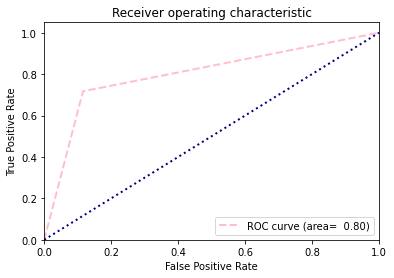

In [102]:
#plotting AUC-ROC curve
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_rf,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, linestyle='--',label='ROC curve (area= % 0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=2, linestyle='dotted')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Further Evaluation:

In [103]:
Final_mod = RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((rf.score(x_test,y_test)*100))


84.99692874692875


# Saving the best model:

In [104]:
import pickle
filename = 'Finalmodel.pkl'
pickle.dump(Final_mod, open(filename,"wb"))
print("Model saved")

Model saved


# Conclusion:

In [106]:
print('Predicted Income',pred[0:20])
print('Actual Income',y_test[0:20].values)


Predicted Income [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0]
Actual Income [[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]


# Thus train and test data is balanced with the accuracy of 85%.